# Instalando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

# Carregando imagens para testar

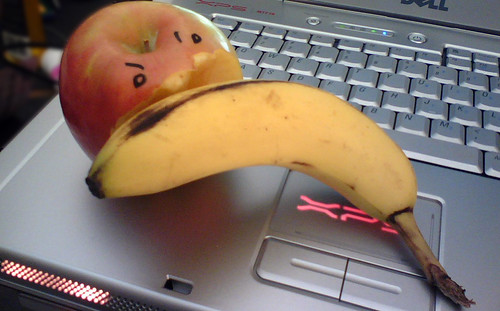

In [ ]:
image = io.imread('http://farm3.static.flickr.com/2026/1544063360_7ec3529266.jpg')
cv2_imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

# Algumas informações das imagens

In [ ]:
print('Altura: ',image.shape[0])
print('Largura: ',image.shape[1])
print('#Canais: ', image.shape[2])

Altura:  311
Largura:  500
#Canais:  3


# Normalizando a imagem


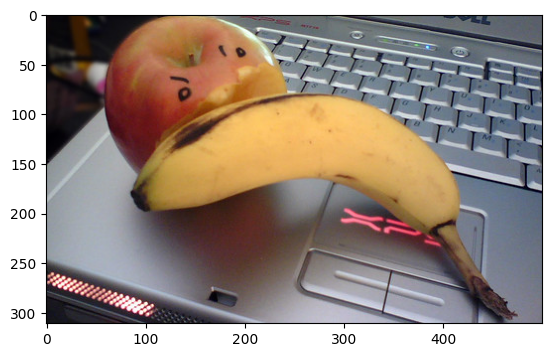

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

img = image / 255
plt.imshow(img)
plt.show()

# Gerando o dataset

In [ ]:
image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
image_2D

array([[0.09019608, 0.05490196, 0.0745098 ],
       [0.0745098 , 0.05098039, 0.06666667],
       [0.06666667, 0.04313725, 0.05882353],
       ...,
       [0.48235294, 0.47843137, 0.53333333],
       [0.46666667, 0.4745098 , 0.52156863],
       [0.45490196, 0.47058824, 0.50588235]])

In [ ]:
image_2D.shape

(155500, 3)

In [ ]:
import pandas as pd

pd.DataFrame(image_2D)

,0,1,2
0,0.090196,0.054902,0.074510
1,0.074510,0.050980,0.066667
2,0.066667,0.043137,0.058824
3,0.058824,0.043137,0.047059
4,0.050980,0.043137,0.047059
...,...,...,...
155495,0.501961,0.486275,0.545098
155496,0.486275,0.482353,0.537255
155497,0.482353,0.478431,0.533333
155498,0.466667,0.474510,0.521569


#  Segmentação com K-Means

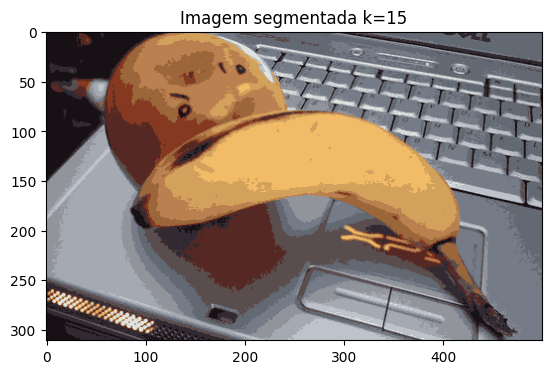

In [ ]:
from sklearn.cluster import KMeans

num_segmentos = 15

kmeans = KMeans(n_clusters=num_segmentos, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]

clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('Imagem segmentada k='+str(num_segmentos))
plt.show()

In [ ]:
rgb_centers = kmeans.cluster_centers_*1
rgb_centers

array([[0.82471697, 0.63713005, 0.36837606],
       [0.33724263, 0.15933841, 0.14310137],
       [0.4611596 , 0.48826441, 0.53553977],
       [0.74589475, 0.76393327, 0.7930603 ],
       [0.09034081, 0.06921822, 0.0828366 ],
       [0.35340039, 0.30213106, 0.30325066],
       [0.94526721, 0.73428098, 0.41092353],
       [0.57340244, 0.5836381 , 0.61258652],
       [0.52276445, 0.22467228, 0.13285963],
       [0.39090942, 0.41432553, 0.45394182],
       [0.64758181, 0.66673638, 0.69900552],
       [0.19790168, 0.16862014, 0.19903279],
       [0.73640926, 0.50537462, 0.31272132],
       [0.61126911, 0.40059376, 0.22622501],
       [0.87717765, 0.89543891, 0.87629118]])

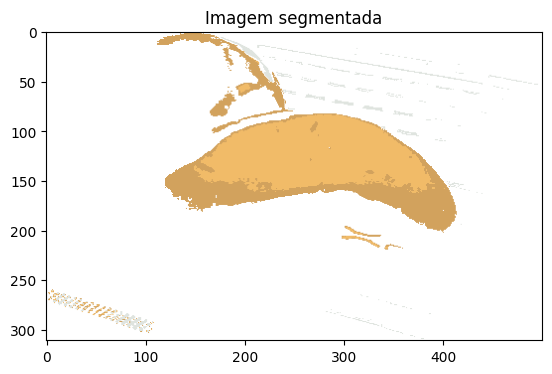

In [ ]:
segmentos_interesse = [0,6,14]

rgb_centers = kmeans.cluster_centers_*1
rgb_centers

for seg in kmeans.labels_:
  if seg not in segmentos_interesse:
    rgb_centers[seg] = [1,1,1]


clustered = rgb_centers[kmeans.labels_]

clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('Imagem segmentada')
plt.show()

In [ ]:
rgb_centers
clustered = rgb_centers[kmeans.labels_]

clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('Imagem segmentada')
plt.show()

# Segmentação usando Mean-Shift

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs


ms = MeanShift(bandwidth=0.15,bin_seeding=True)
ms.fit(image_2D)

In [ ]:
num_segmentos = len( np.unique(ms.labels_))

clustered = ms.cluster_centers_[ms.labels_]

clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('Imagem segmentada com MS k='+str(num_segmentos))
plt.show()

In [ ]:
rgb_centers = ms.cluster_centers_*1
rgb_centers[0] = [1,1,1]
rgb_centers[1] = [1,1,1]
rgb_centers[2] = [1,1,1]
#rgb_centers[3] = [1,1,1]
rgb_centers[4] = [1,1,1]
rgb_centers[5] = [1,1,1]
rgb_centers[6] = [1,1,1]
rgb_centers[7] = [1,1,1]

clustered = rgb_centers[ms.labels_]

clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('Imagem segmentada')
plt.show()

rgb_centers